In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


csv_files = ["LTE Dataset/static/A_2017.11.22_10.06.58.csv","LTE Dataset/static/A_2017.11.23_10.08.29.csv","LTE Dataset/static/A_2017.11.23_13.14.40.csv","LTE Dataset/static/A_2017.11.28_11.55.31.csv","LTE Dataset/static/A_2017.11.30_16.15.00.csv","LTE Dataset/static/A_2017.11.30_16.15.04.csv","LTE Dataset/static/A_2017.12.03_10.09.56.csv","LTE Dataset/static/A_2017.12.03_10.35.01.csv","LTE Dataset/static/A_2017.12.15_11.05.30.csv","LTE Dataset/static/A_2017.12.18_12.20.34.csv","LTE Dataset/static/A_2018.01.27_13.58.29.csv","LTE Dataset/static/A_2018.02.12_16.14.02.csv"]
dataframes = []
for file in csv_files:
    df = pd.read_csv(file) 
    dataframes.append(df)
lte_df_static = pd.concat(dataframes, ignore_index=True)
lte_df_static.to_csv('lte_static.csv', index=False)


lte_df = pd.read_csv("lte_static.csv",sep=',')
non_useful_features = ['Timestamp','Operatorname','NetworkMode','State','Speed']
lte_df = lte_df.drop(columns = non_useful_features)
print("LTE database columnsa are ", lte_df.columns)

print(len(lte_df))
lte_df.sample(5)

LTE database columnsa are  Index(['Longitude', 'Latitude', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI',
       'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ', 'ServingCell_Lon',
       'ServingCell_Lat', 'ServingCell_Distance'],
      dtype='object')
12963


,Longitude,Latitude,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance
5873,-8.501012,51.892888,8,-102,-11,6.0,10,-86,4730,248,-119.0,-15.0,-,-,-
6310,-8.499976,51.893397,8,-102,-15,7.0,9,-85,4328,80,-116.0,-15.0,-,-,-
2306,-8.500276,51.894638,2,-119,-14,4.0,9,-94,984,18,-,-,-8.491719,51.893905,592.81
1023,-8.501060,51.895161,2,-118,-14,5.0,9,-94,1319,62,-,-,-8.491719,51.893905,656.01
9208,-8.512467,51.891524,6,-122,-18,-6.0,9,-94,4216,78,-121.0,-18.0,-8.499975,51.888465,922.3


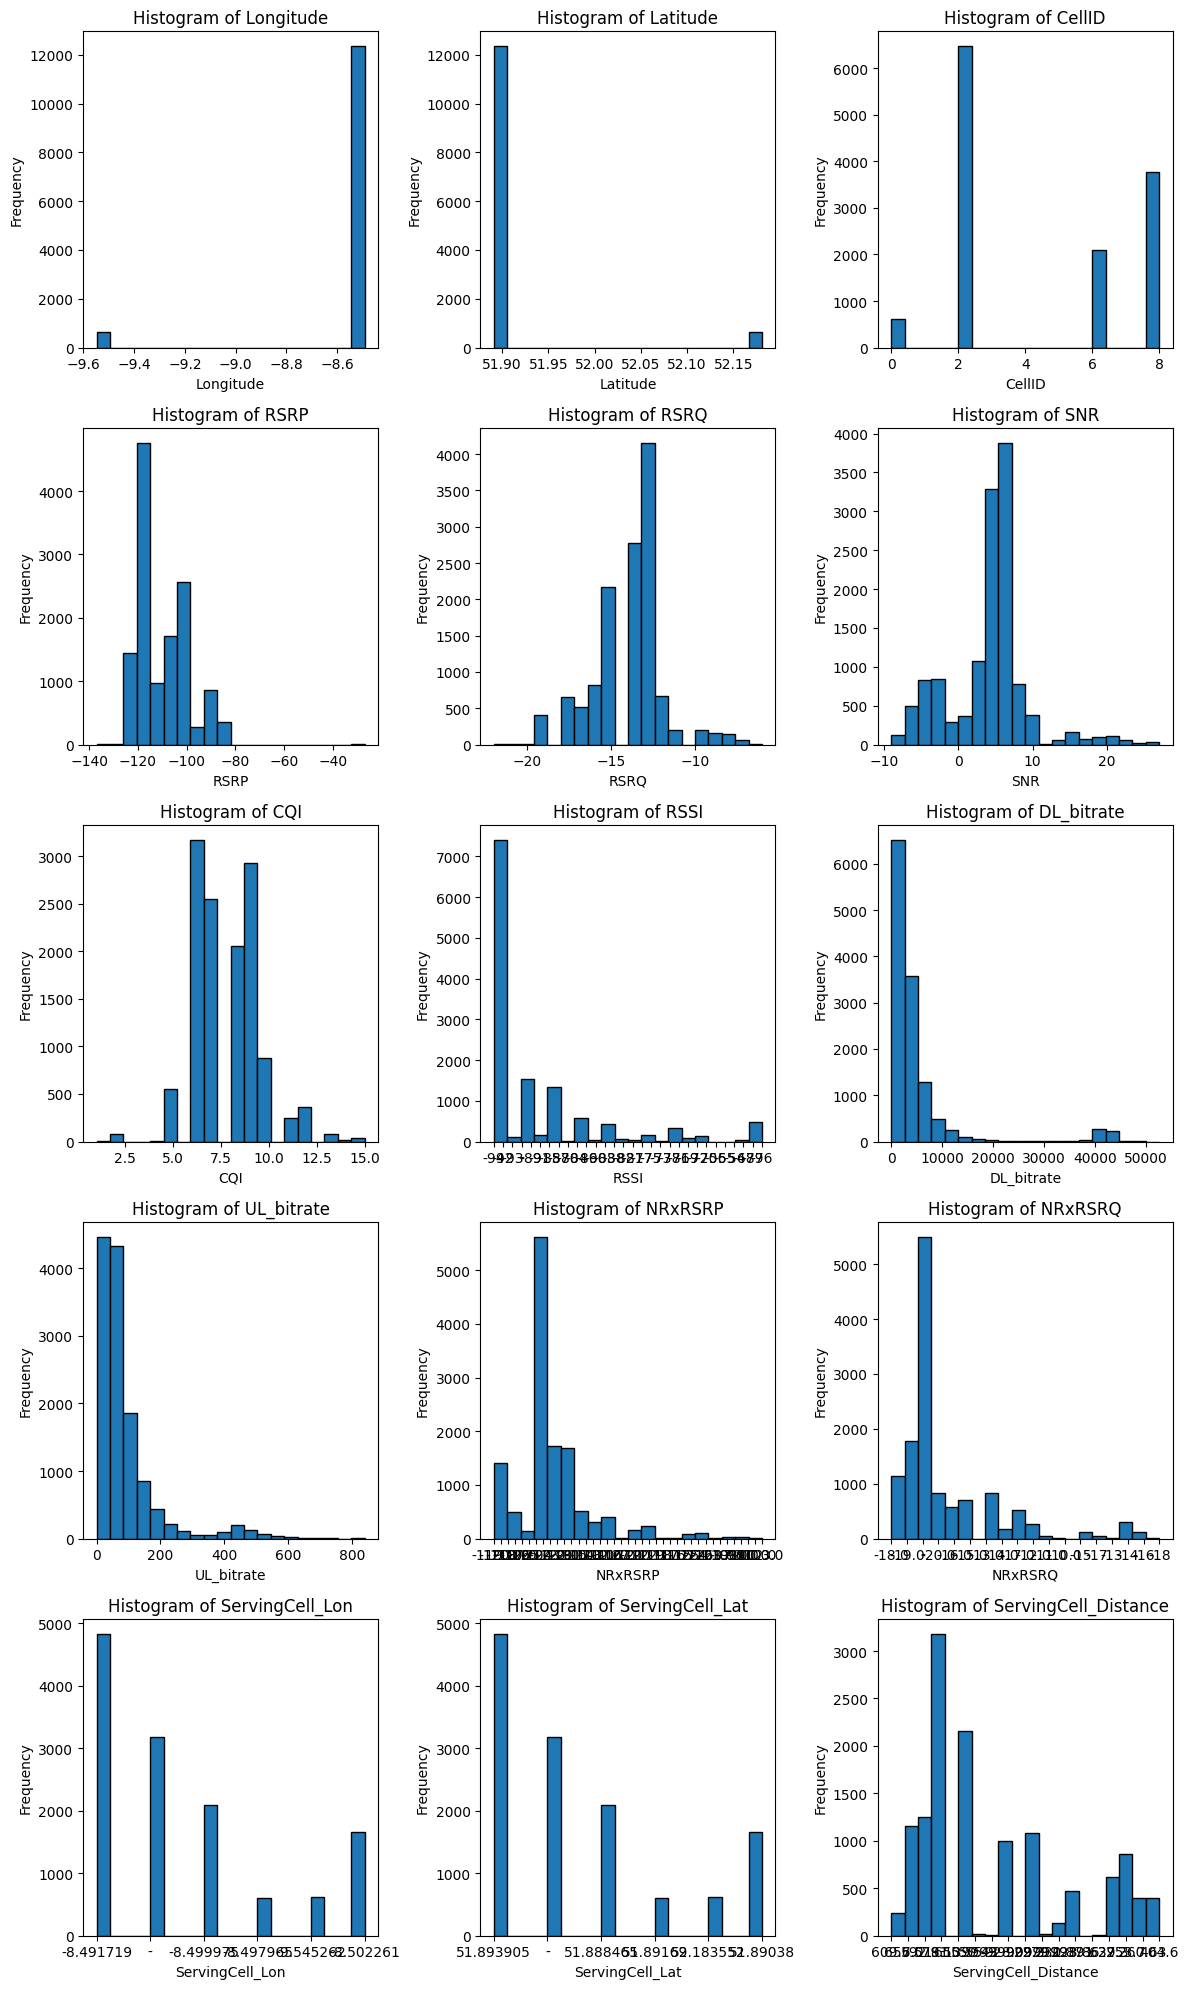

In [5]:
num_cols = len(lte_df.columns)
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0) 

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, col in enumerate(lte_df.columns):
    axes[i].hist(lte_df[col], bins=20, edgecolor='black') 
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

12963 and there are NR values in  7473


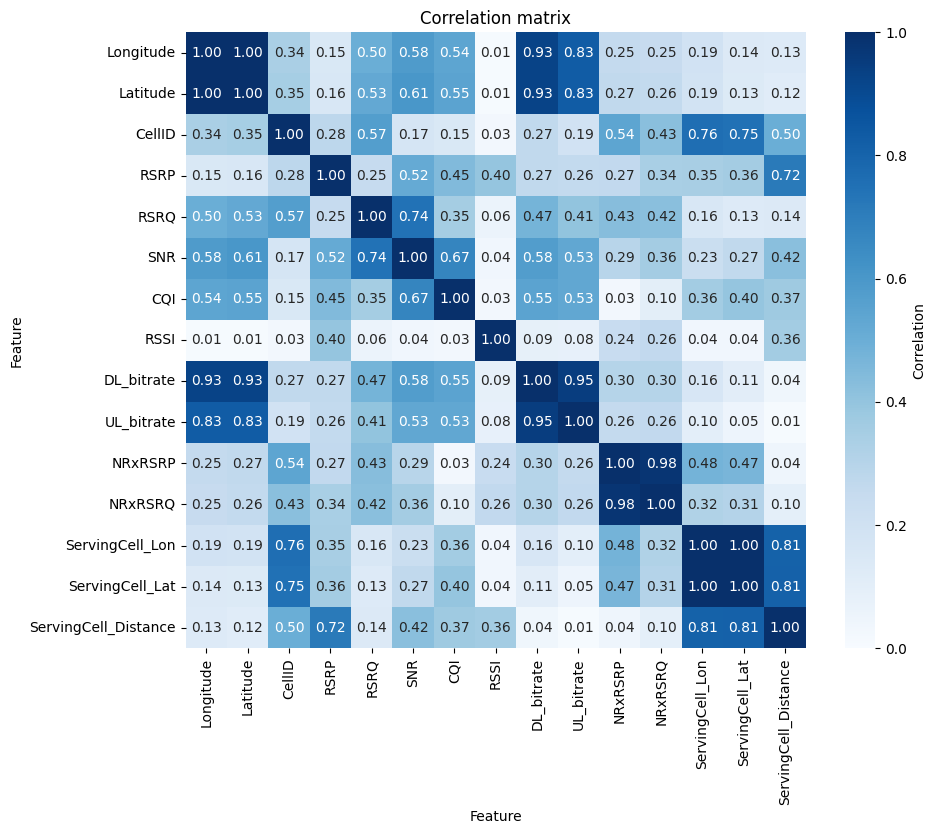

In [4]:
lte_df_copy = lte_df.copy()
lte_df_copy.replace('-', 0, inplace=True)

print(len(lte_df_copy), "and there are NR values in ",len(lte_df_copy[lte_df_copy['NRxRSRP']!=0]))

# define the scaler
scaler = StandardScaler()
# for each column in the dataset, fit and transform the data
columns=lte_df_copy.columns
lte_df_copy[columns] = scaler.fit_transform(lte_df_copy[columns])
# See scaled data
lte_df_copy.head()


correlation_matrix = lte_df_copy.corr().abs()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()